<a href="https://colab.research.google.com/github/Vaishnavi-Hegde17/Deep_Learning-and-Gen_AI-Lab/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week-4: Building a CNN for Image Classification
- Design and implement a CNN model (with 4+ layers of convolutions) to classify multi category
image datasets.
- Use the Fashion MNIST dataset.
- Set the number of Epoch as 5, 10 and 20.
- Make the necessary changes whenever required. Record the accuracy corresponding to the number
of epochs.
- Record the time required to run the program, using CPU as well as using GPU in Colab.

Fashion MNIST Dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [1]:
# For GPU
import keras

from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28, (3,3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
409/938 ━━━━━━━━━━━━━━━━━━━━ 4:30 511ms/step - accuracy: 0.6557 - loss: 0.9499

KeyboardInterrupt: 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with 5 epochs...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3867 - loss: 1.6682 - val_accuracy: 0.6029 - val_loss: 1.1130
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6508 - loss: 0.9913 - val_accuracy: 0.6999 - val_loss: 0.8726
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7392 - loss: 0.7359 - val_accuracy: 0.7309 - val_loss: 0.7823
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7998 - loss: 0.5708 - val_accuracy: 0.7367 - val_loss: 0.7797
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8494 - loss: 0.4262 - val_accuracy: 0.7532 - val_loss: 0.7497
Test loss after 5 epochs: 0.7497
Test accuracy after 5 epochs: 0.7532
Training time for 5 epochs: 43.40 seconds

Training with 10 epochs...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9001 - loss: 0.2923 - val_accuracy: 0.7485 - val_loss: 0.8414
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.

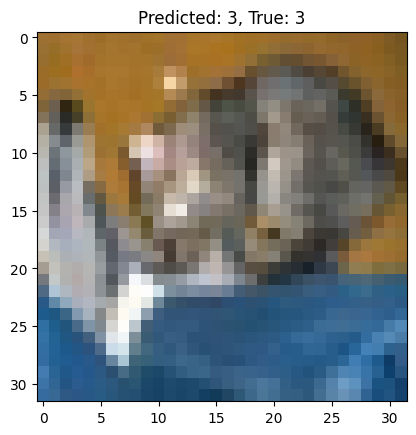

In [1]:

import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import time

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Preprocess the data
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# Convert labels to one-hot encoding
train_Y_one_hot = to_categorical(train_Y, num_classes=10)
test_Y_one_hot = to_categorical(test_Y, num_classes=10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model and record training time
epochs = [5, 10, 20]
results = {}

for epoch_count in epochs:
  print(f"\nTraining with {epoch_count} epochs...")
  start_time = time.time()
  history = model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=epoch_count, validation_data=(test_X, test_Y_one_hot))
  end_time = time.time()
  training_time = end_time - start_time

  # Evaluate the model
  test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=0)
  print(f'Test loss after {epoch_count} epochs: {test_loss:.4f}')
  print(f'Test accuracy after {epoch_count} epochs: {test_acc:.4f}')
  print(f'Training time for {epoch_count} epochs: {training_time:.2f} seconds')

  results[epoch_count] = {'accuracy': test_acc, 'time': training_time}

# Print results summary
print("\n--- Training Results Summary ---")
for epoch_count, data in results.items():
  print(f"Epochs: {epoch_count}, Accuracy: {data['accuracy']:.4f}, Time: {data['time']:.2f}s")

# Make a prediction on a test image
predictions = model.predict(test_X)
predicted_class = np.argmax(np.round(predictions[0]))
true_class = np.argmax(test_Y_one_hot[0])

print(f"\nPrediction for the first test image: {predicted_class}")
print(f"True label for the first test image: {true_class}")

# Display the first test image
plt.imshow(test_X[0])
plt.title(f"Predicted: {predicted_class}, True: {true_class}")
plt.show()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with 5 epochs...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7806 - loss: 0.6088 - val_accuracy: 0.8812 - val_loss: 0.3156
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9031 - loss: 0.2684 - val_accuracy: 0.9053 - val_loss: 0.2585
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9217 - loss: 0.2116 - val_accuracy: 0.9169 - val_loss: 0.2222
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9335 - loss: 0.1794 - val_accuracy: 0.9201 - val_loss: 0.2256
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9444 - loss: 0.1485 - val_accuracy: 0.9217 - val_loss: 0.2195
Test loss after 5 epochs: 0.2195
Test accuracy after 5 epochs: 0.9217
Training time for 5 epochs: 54.31 seconds

Training with 10 epochs...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9541 - loss: 0.1197 - val_accuracy: 0.9210 - val_loss: 0.2391
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9

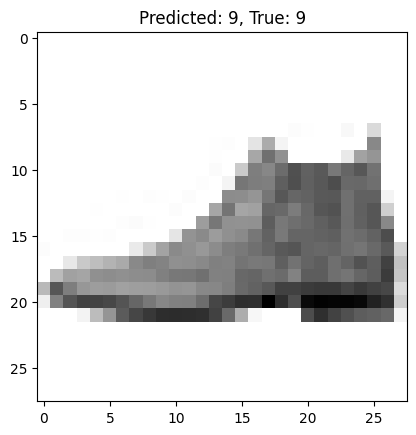

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import keras # Import keras to access datasets
from keras.datasets import fashion_mnist # Import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import time

# Fashion MNIST Dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0
train_Y_one_hot = to_categorical(train_Y, num_classes=10)
test_Y_one_hot = to_categorical(test_Y, num_classes=10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model and record training time
epochs = [5, 10]
results = {}

for epoch_count in epochs:
  print(f"\nTraining with {epoch_count} epochs...")
  start_time = time.time()
  history = model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=epoch_count, validation_data=(test_X, test_Y_one_hot))
  end_time = time.time()
  training_time = end_time - start_time

  # Evaluate the model
  test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=0)
  print(f'Test loss after {epoch_count} epochs: {test_loss:.4f}')
  print(f'Test accuracy after {epoch_count} epochs: {test_acc:.4f}')
  print(f'Training time for {epoch_count} epochs: {training_time:.2f} seconds')

  results[epoch_count] = {'accuracy': test_acc, 'time': training_time}

# Print results summary
print("\n--- Training Results Summary ---")
for epoch_count, data in results.items():
  print(f"Epochs: {epoch_count}, Accuracy: {data['accuracy']:.4f}, Time: {data['time']:.2f}s")

# Make a prediction on a test image
predictions = model.predict(test_X)
predicted_class = np.argmax(np.round(predictions[0]))
true_class = np.argmax(test_Y_one_hot[0])

print(f"\nPrediction for the first test image: {predicted_class}")
print(f"True label for the first test image: {true_class}")

# Display the first test image
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.title(f"Predicted: {predicted_class}, True: {true_class}")
plt.show()